In [1]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import halfnorm
from random import sample
from random import choices
import math
import random
import statistics

# We design an experiment to test the performances of bootstrap method on estimating the standard error of sample mean distribution
## We first simulate data from halfnormal distribution and consider this is the population distribution

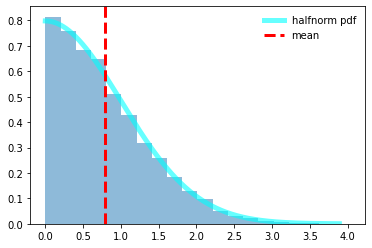

mean: 0.795


In [58]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = halfnorm.stats(moments='mvsk')
x = np.linspace(halfnorm.ppf(0.0001),
                halfnorm.ppf(0.9999), 10000)
plt.plot(x, halfnorm.pdf(x),
       'cyan', lw=5, alpha=0.6, label='halfnorm pdf')
r = halfnorm.rvs(size=10000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.5,bins=20)
ax.axvline(np.mean(r),color='red',ls='--',lw='3',label='mean')
ax.legend(loc='best', frameon=False)
plt.show()
mean=np.mean(r)
var=np.var(r)
print('mean:',round(mean,3))
#print("var:",round(var,3))

## Then we simulate the sample mean distribution by repeatedly sampling from population distribution

In [59]:
#draw samples from real distributions
M=[]
random.seed(1)
for i in range(10000):
    sample_mean=np.mean(sample(list(r),100))
    M.append(sample_mean) 

mean value: 0.7946
se of mean value: 0.0599
confidence interval for mean value is [0.6803 , 0.9138]


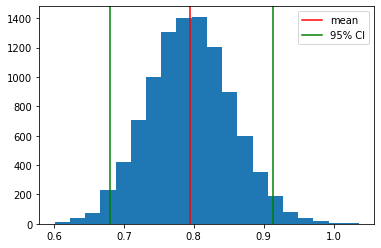

In [60]:
plt.hist(M,bins=20)
plt.axvline(np.mean(M),color='red',label='mean')
q1=round(np.quantile(M,q=0.025),4)
q2=round(np.quantile(M,q=0.975),4)
plt.axvline(q1,color='green',label='95% CI')
plt.axvline(q2,color='green')
plt.legend()
print('mean value:',round(np.mean(M),4))
print("se of mean value:",round(math.sqrt(np.var(M)),4))
print('confidence interval for mean value is [{} , {}]' .format (q1,q2))

## We first define the bootstrap function

In [61]:
def bootstrap(sample,B=500,seed=1,func=None):
    Boot=[]
    random.seed(seed)
    for iteration in range(B):
        boot_sample=choices(sample,k=len(sample))
        boot_mean=np.mean(boot_sample)
        Boot.append(boot_mean)
    se=math.sqrt(np.var(Boot))
    return (se,Boot)

## Then we draw a sample from the population distribution and bootstrap it for 500 times

In [79]:
random.seed(1)
sample_x=sample(list(r),100)#random sample/ sample data
est_mean=np.mean(sample_x)
print("sample mean :",round(est_mean,4))

sample mean : 0.8146


In [80]:
test=bootstrap(sample_x,B=500,seed=1)
theory_se=math.sqrt(var/len(sample_x))
print("boostrap estimated standard error:",round(test[0],4))
print("theoretical standard error:",round(theory_se,4))
print("relative error of estimation:",round(abs(test[0]-theory_se)/theory_se,4))

boostrap estimated standard error: 0.076
theoretical standard error: 0.0605
relative error of estimation: 0.2554


## We repeat above process for 1000 times, and get a mean relative error of estimation about 7%

In [66]:
theory_se=math.sqrt(np.var(M))
Relative_error=[]
for i in range(1000):
    random.seed(i)
    sample_x=sample(list(r),100)
    test=bootstrap(sample_x,B=500,seed=1)
    Relative_error.append(round(abs(test[0]-theory_se)/theory_se,4))
print(np.mean(Relative_error))

0.0734549


## We also test on Poisson Distribution

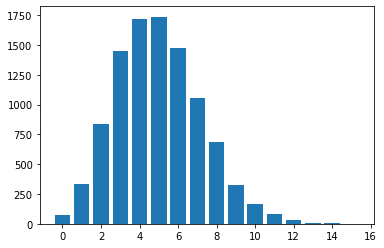

mean: 4.98
mean square: 24.8
var: 4.942


In [81]:
from scipy.stats import poisson
np.random.seed(1)
s = np.random.poisson(5, 10000)
keys, counts = np.unique(s, return_counts=True)
plt.bar(keys, counts)
plt.show()
mean=np.mean(s)
var=np.var(s)
stat=np.mean([x**2 for x in list(s)])#sum of x**2
print('mean:',round(mean,3))
print('mean square:',round(mean**2,3))
print("var:",round(var,3))
#print('self defined statistics:',stat)


In [82]:
#draw samples from real distributions
R=[];RR=[]
np.random.seed(1)
for i in range(10000):
    
    sam=sample(list(s),100)
    R.append(np.mean(sam)) 

mean value: 4.9792
se of mean value: 0.2218
confidence interval for mean value is [4.56 , 5.42]


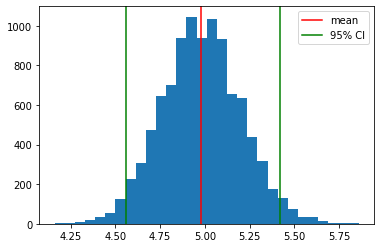

In [83]:
plt.hist(R,bins=30)
plt.axvline(np.mean(R),color='red',label='mean')
q1=round(np.quantile(R,q=0.025),4)
q2=round(np.quantile(R,q=0.975),4)
plt.axvline(q1,color='green',label='95% CI')
plt.axvline(q2,color='green')
plt.legend()
print('mean value:',round(np.mean(R),4))
print("se of mean value:",round(math.sqrt(np.var(R)),4))
print('confidence interval for mean value is [{} , {}]' .format (q1,q2))

## The mean relative error of estimation is about 6%

In [84]:
theory_se=math.sqrt(np.var(R))
Relative_error=[]
for i in range(1000):
    random.seed(i)
    sample_x=sample(list(s),100)
    test=bootstrap(sample_x,B=500,seed=1)
    Relative_error.append(round(abs(test[0]-theory_se)/theory_se,4))

In [85]:
np.mean(Relative_error)

0.060665300000000005